In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as time

from scipy import sparse
from scipy.sparse import linalg

from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Learning the Finite Element Method. Step 3

In this Step, we continue using **classes**.
- we discuss additional boundary conditions (namely, Neumann BC and Robin BC in addition to the Dirichlet BC we have been using so far)
- we code an FEM class

# Boundary Conditions

### Boundary Conditions in 1D Finite Element Method (FEM) Codes: Dirichlet, Neumann, and Robin

Boundary conditions are essential in solving differential equations, as they define the behavior of the solution at the boundaries of the domain. In the context of the 1D Finite Element Method (FEM), boundary conditions are used to specify how the solution behaves at the edges of the domain (e.g., at \(x = 0\) and \(x = L\), where \(L\) is the length of the domain). The three most common types of boundary conditions are Dirichlet, Neumann, and Robin. Below is a detailed explanation of each type.

#### 1. **Dirichlet Boundary Conditions**

Dirichlet boundary conditions specify the value of the solution directly at the boundary. In mathematical terms, if \( u(x) \) is the solution to the differential equation, a Dirichlet boundary condition at \( x = 0 \) would be of the form:

\[ u(0) = u_0 \]

where \( u_0 \) is a known constant.

**Example Application in 1D FEM:**
In a 1D FEM code, applying a Dirichlet boundary condition means directly setting the value of the solution vector at the boundary node to the specified value. For instance, if your domain is divided into finite elements with nodes at \( x = 0 \) and \( x = L \), you would enforce the Dirichlet condition by modifying the global stiffness matrix and load vector to ensure that the solution at the boundary node equals \( u_0 \).

**Implementation Tip:**
In practice, this might involve setting the corresponding row in the stiffness matrix to zero (except for the diagonal element) and setting the load vector entry to the value \( u_0 \). The stiffness matrix entry at the boundary node's diagonal would typically be set to 1 to maintain matrix stability.

#### 2. **Neumann Boundary Conditions**

Neumann boundary conditions specify the value of the derivative (flux) of the solution at the boundary. For example, a Neumann boundary condition at \( x = 0 \) might be expressed as:

\[ \frac{du}{dx}\bigg|_{x=0} = q_0 \]

where \( q_0 \) is a known constant flux.

**Example Application in 1D FEM:**
In 1D FEM, Neumann boundary conditions are applied by adjusting the load vector. The specified flux \( q_0 \) is added directly to the load vector entry corresponding to the boundary node. This reflects the influence of the boundary condition on the overall solution.

**Implementation Tip:**
To implement a Neumann boundary condition, simply modify the load vector entry at the boundary node to include the contribution from the boundary flux. The stiffness matrix remains unchanged.

#### 3. **Robin Boundary Conditions**

Robin boundary conditions are a combination of Dirichlet and Neumann boundary conditions. They specify a linear combination of the solution and its derivative at the boundary. The general form of a Robin boundary condition at \( x = 0 \) is:

\[ \alpha u(0) + \beta \frac{du}{dx}\bigg|_{x=0} = \gamma \]

where \( \alpha \), \( \beta \), and \( \gamma \) are known constants.

**Example Application in 1D FEM:**
In 1D FEM, Robin boundary conditions require modifying both the stiffness matrix and the load vector. The boundary condition introduces additional terms that couple the solution and its derivative, and these must be incorporated into the global system of equations.

**Implementation Tip:**
To implement a Robin boundary condition:
- Adjust the stiffness matrix at the boundary node by adding a term proportional to \( \alpha \).
- Modify the load vector entry by adding a term proportional to \( \gamma \) and possibly \( \beta \) depending on the discretization scheme.

### Summary

In summary, each type of boundary condition in 1D FEM—Dirichlet, Neumann, and Robin—has a specific role in defining the behavior of the solution at the domain boundaries:

- **Dirichlet:** Directly sets the solution value at the boundary.
- **Neumann:** Specifies the derivative (flux) of the solution at the boundary.
- **Robin:** Combines both the solution value and its derivative at the boundary.

Correctly implementing these boundary conditions is crucial for ensuring the accuracy and stability of the FEM solution. Understanding how to apply them in a 1D FEM code lays the groundwork for extending these concepts to more complex problems and higher dimensions.


# class for FEM solver

### Assignment: Implementing a 1D Finite Element Method (FEM) Solver

#### Objective:
In this assignment, you will develop a Python class called `FEM_solver` that implements the Finite Element Method (FEM) for solving 1D partial differential equations (PDEs). The class will be capable of generating elemental matrices, assembling the global system, applying various boundary conditions, and solving the system of equations. You will also implement methods to ensure the class handles different types of boundary conditions, such as Dirichlet, Neumann, and Robin.

#### Requirements:

1. **Class Definition**:
   - Create a Python class named `FEM_solver`.

2. **Constructor (`__init__` method)**:
   - The constructor should take the following parameters:
     - `degree`: An integer specifying the degree of the quadrature for numerical integration. Default is 3.
     - `verbose`: A boolean flag (`True` or `False`) that controls the verbosity of the output. When `True`, additional information about the matrices and vectors should be printed.
   - Inside the constructor:
     - Initialize the basis functions and their derivatives using the `basis()` method.
     - Compute the elemental matrices by calling the `compute_elemental_matrices(degree)` method.

3. **Basis Functions (`basis` method)**:
   - Implement a method named `basis` that defines:
     - `self.b`: A list of lambda functions representing the basis functions over the reference element \([-1, 1]\).
     - `self.dbdx`: A list of lambda functions representing the derivatives of the basis functions with respect to the spatial coordinate.

4. **Elemental Matrices (`compute_elemental_matrices` method)**:
   - Implement a method named `compute_elemental_matrices(degree)` that:
     - Uses Gauss-Legendre quadrature of the specified `degree` to integrate the basis functions and their derivatives.
     - Computes the elemental stiffness matrix `self.Kxx`, the mass matrix `self.M`, and the load vector `self.Q`.
     - If `verbose` is `True`, prints the matrices and vector for debugging purposes.

5. **System Assembly (`assemble_system` method)**:
   - Implement a method named `assemble_system(mesh, prop, bc)` that:
     - Assembles the global stiffness matrix `A` and the global load vector `rhs` based on the properties of the mesh and materials.
     - Applies material properties and source terms from the `prop` dictionary.
     - Calls the `apply_boundary_conditions(A, rhs, bc, n_nodes)` method to apply boundary conditions.
     - Returns the assembled global stiffness matrix `A` and load vector `rhs`.

6. **Boundary Conditions (`apply_boundary_conditions` method)**:
   - Implement a method named `apply_boundary_conditions(A, rhs, bc, n_nodes)` that:
     - Applies Dirichlet, Neumann, and Robin boundary conditions as specified in the `bc` dictionary.
     - Modifies `A` and `rhs` in place according to the boundary conditions.
     - Returns the modified `A` and `rhs`.

7. **System Solver (`solve_system` method)**:
   - Implement a method named `solve_system(A, b)` that:
     - Solves the linear system \(Ax = b\) using a sparse solver and returns the solution vector.

8. **Testing the Class**:
   - After implementing the `FEM_solver` class, create a test case with a simple mesh and material properties.
   - Define boundary conditions (Dirichlet, Neumann, and Robin) and verify that the class handles them correctly.
   - Use the `verbose=True` flag to check the output of the elemental matrices and the assembled system.

9. **Submission**:
   - Submit the Python file containing the `FEM_solver` class definition.
   - Include a short report (1-2 pages) explaining your implementation, the purpose of each method, and how boundary conditions are handled.
   - Provide examples of the test cases you used and their results.

#### Grading Criteria:
- **Correctness** (40%): Does the class correctly implement the FEM and handle the various boundary conditions?
- **Code Quality** (30%): Is the code well-organized, with clear naming conventions, comments, and appropriate use of functions?
- **Error Handling** (10%): Does the code appropriately handle invalid inputs and edge cases?
- **Documentation and Reporting** (20%): Is the class well-documented with meaningful docstrings? Does the report clearly explain the design and functionality?

---

### Tips:
- Pay close attention to the application of boundary conditions, as this is crucial for the correct behavior of the FEM solver.
- Test your class thoroughly with different configurations to ensure it handles various scenarios as expected.
- Use the `verbose` option to debug and verify the internal calculations of the class.


## Implement this yourself

## The answer is below but only look at it after genuinely trying to do it yourself

# FEM class

In [2]:
class FEM_solver:
    def __init__(self, degree=3, verbose=False):
        self.verbose = verbose
        
        # Compute the cFEM basis functions
        self.basis()
        
        # Compute the elemental matrices
        self.compute_elemental_matrices(degree)

    
    
    def basis(self):
        """Defines the basis functions and their derivatives for the FEM."""
        self.b = [
            lambda u: (1 - u) / 2,  # First basis function
            lambda u: (1 + u) / 2   # Second basis function
        ]
        
        self.dbdx = [
            lambda u: -0.5,  # Derivative of the first basis function
            lambda u: 0.5    # Derivative of the second basis function
        ]        
        
    def compute_elemental_matrices(self, degree):
        """Computes the elemental matrices for the FEM based on the provided degree."""
        # Select spatial quadrature
        [x_,w_] = np.polynomial.legendre.leggauss(degree)

        # Initialize local matrices
        local_dofs = len(self.b)
        self.Kxx = np.zeros((local_dofs,local_dofs))
        self.M   = np.zeros((local_dofs,local_dofs))
        self.Q   = np.zeros(local_dofs)

        # Compute matrices using quadrature points
        for (uq,wuq) in zip(x_,w_):
            for i,(fi,fxi) in enumerate(zip(self.b,self.dbdx)):
                self.Q[i]   += wuq * fi(uq)
                for j,(fj,fxj) in enumerate(zip(self.b,self.dbdx)):
                    self.M[i,j]   += wuq * fi (uq) * fj (uq)
                    self.Kxx[i,j] += wuq * fxi(uq) * fxj(uq)

        if self.verbose:
            print("Stiffness Matrix (Kxx):\n", self.Kxx)
            print("Mass Matrix (M):\n", self.M)
            print("Load Vector (Q):\n", self.Q)
            

    def assemble_system(self, mesh, prop, bc):
        """Assembles the global FEM system including stiffness matrix and load vector."""
        # Sanity check on boundary conditions
        if len(bc) !=2:
            raise ValueError('bc dictionary must have 2 keys')
                
        # Initialize global stiffness matrix and load vector
        n_nodes = mesh.n_cells + 1
        A = sparse.lil_matrix((n_nodes,n_nodes))
        # rhs
        rhs = np.zeros(n_nodes)

        # Loop over elements to assemble the global system
        for iel in range(mesh.n_cells):
            mat_id = mesh.cell2mat[iel]
            src_id = mesh.cell2src[iel]
            src_prop = prop['src'][src_id]
            difc = prop['D'][mat_id]
            siga = prop['siga'][mat_id]
            
            for i,glob_i in enumerate(mesh.gn[iel,:]):
                rhs[glob_i] += src_prop * mesh.J[iel] * self.Q[i]
                
                for j,glob_j in enumerate(mesh.gn[iel,:]):
                    A[glob_i,glob_j] += difc * 1/mesh.J[iel] * self.Kxx[i,j] \
                                        + siga * mesh.J[iel] * self.M[i,j]

        # Apply boundary conditions
        self.apply_boundary_conditions(A, rhs, bc, n_nodes)

        return A, rhs
    

    def apply_boundary_conditions(self, A, rhs, bc, n_nodes):
        """Applies the Dirichlet, Neumann, and Robin boundary conditions."""
        dir_nodes = []
        u_dir = []

        # Apply Dirichlet conditions
        if bc['xmin']['type'] == 'dirichlet':
            dir_nodes.append(0)
            u_dir.append(bc['xmin']['value'])
        if bc['xmax']['type'] == 'dirichlet':
            dir_nodes.append(n_nodes - 1)
            u_dir.append(bc['xmax']['value'])

        dir_nodes = np.asarray(dir_nodes)
        
        for i, inode in enumerate(dir_nodes):
            A[inode, :] = 0.
            A[inode, inode] = 1.
            rhs[inode] = u_dir[i]

        # Apply Robin conditions
        if bc['xmin']['type'] == 'robin':
            A[0, 0] += 0.5
            rhs[0] += 2 * bc['xmin']['value']
        if bc['xmax']['type'] == 'robin':
            A[-1, -1] += 0.5
            rhs[-1] += 2 * bc['xmax']['value']

        # Apply Neumann conditions
        if bc['xmin']['type'] == 'neumann':
            rhs[0] += bc['xmin']['value']
        if bc['xmax']['type'] == 'neumann':
            rhs[-1] += bc['xmax']['value']

        return A, rhs
   
    def solve_system(self, A, b):
        """Solves the linear system Ax = b using sparse matrix solver."""
        solution = linalg.spsolve(A.tocsc(), b)

        return solution   

## Class MESH (copied from Step-2)

In [3]:
import logging

class MESH:
    def __init__(self, mat_layout, src_layout, width, n_ref, verbose=False):
        # Create a logger
        self.logger = logging.getLogger(__name__)
        
        # Set the logging level based on the verbose flag
        if verbose:
            self.logger.setLevel(logging.DEBUG)
        else:
            self.logger.setLevel(logging.INFO)
        
        # Ensure we have a StreamHandler to output logs in Jupyter
        if not self.logger.hasHandlers():
            handler = logging.StreamHandler()
            handler.setLevel(logging.DEBUG if verbose else logging.INFO)
            formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
            handler.setFormatter(formatter)
            self.logger.addHandler(handler)
        
        if len(mat_layout) != len(src_layout):
            raise ValueError("MESH::mat_layout and src_layout must be of the same length")
        if len(mat_layout) != len(width):
            raise ValueError("MESH::mat_layout and width must be of the same length")
        if len(width) != len(n_ref):
            raise ValueError("MESH::width and nref must be of the same length")
            
        # Number of materials and cells
        self.n_zones = len(width)
        self.n_cells = np.sum(n_ref)

        # Initialize arrays: cell width
        dx = np.zeros(self.n_cells)
        # Initialize arrays: mapping from cell ID to material/src ID
        cell2mat = np.zeros(self.n_cells, dtype=int)
        cell2src = np.zeros(self.n_cells, dtype=int)

        ibeg = 0
        for m in range(self.n_zones):
            # create cellID to matID mapping
            iend = ibeg + n_ref[m]
#             if verbose:
#                 print("MESH::range for current material:", ibeg, iend)
            self.logger.debug(f"MESH::range for current material: {ibeg} to {iend}")
            dx[ibeg:iend] = width[m] / n_ref[m]
            cell2mat[ibeg:iend] = mat_layout[m]
            cell2src[ibeg:iend] = src_layout[m]
            ibeg = iend
        
        # Store arrays in the object
        self.dx = np.copy(dx)
        self.J = np.copy(dx)/2. # Jacobian of the mapping, in 1D = Half-cell widths for FEM
        self.cell2mat = np.copy(cell2mat)
        self.cell2src = np.copy(cell2src)

        # Generate connectivity
        self.connectivity()

    
    def connectivity(self):
        """Generate the connectivity matrix for a 1D mesh."""
        # gn is the global numbering. 
        # another (longer) name for gn would be connectivity_matrix
        self.gn = np.zeros((self.n_cells,2),dtype=int)

        iel = 0
        for i in range(self.n_cells):
            # Connect each cell left to right
            self.gn[iel,0] = iel
            self.gn[iel,1] = iel+1

            iel += 1    

# Example-1

In [4]:
D = np.array([2.,1.])
sigma = np.array([0.2,1.])
q = np.array([0.,10.])

prop = {}
prop['src']  = q
prop['D']    = D
prop['siga'] = sigma

bc = {}
bc['xmin']={'type':'dirichlet','value':2.}
bc['xmax']={'type':'dirichlet','value':5.}


# pick 10 regions
imat_geo = [0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

np.random.seed(123456)
r = np.random.random(10)
widths = 1. + 0.*r
# print(widths)

nrefs_coarse =  3*np.ones(len(imat_geo),dtype=int)
nrefs_fine   = 30*np.ones(len(imat_geo),dtype=int)

In [5]:
mesh_coarse = MESH(imat_geo, imat_geo, widths, nrefs_coarse)
mesh_fine   = MESH(imat_geo, imat_geo, widths, nrefs_fine  )

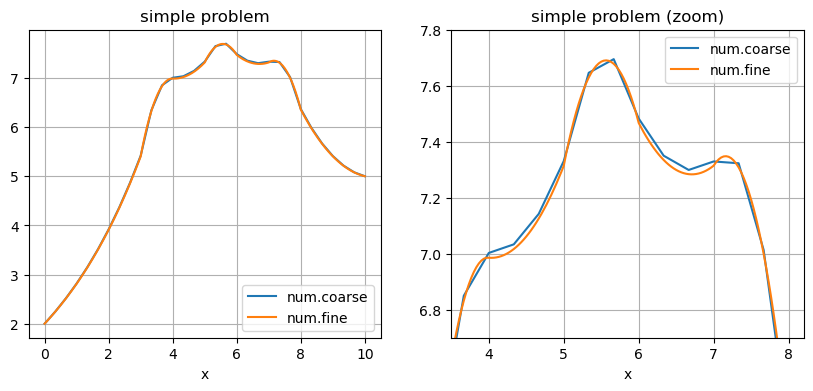

In [6]:
# create solver object
solver = FEM_solver()

# solve
A_coarse,b_coarse = solver.assemble_system(mesh_coarse,prop,bc)
solution_coarse = solver.solve_system(A_coarse,b_coarse)

# solve
A_fine,b_fine = solver.assemble_system(mesh_fine,prop,bc)
solution_fine = solver.solve_system(A_fine, b_fine)

# plots
x_coarse = np.cumsum(mesh_coarse.dx); x_coarse = np.insert(x_coarse,0,0.)
x_fine = np.cumsum(mesh_fine.dx); x_fine = np.insert(x_fine,0,0.)

fig, axs = plt.subplots(1,2,figsize=(10,4))

axs[0].plot(x_coarse,solution_coarse, label='num.coarse')
axs[0].plot(x_fine  ,solution_fine  , label='num.fine')
axs[0].grid(True)
axs[0].legend()
axs[0].set_xlabel('x')
axs[0].set_title('simple problem')

# zoom
axs[1].plot(x_coarse,solution_coarse, label='num.coarse')
axs[1].plot(x_fine  ,solution_fine  , label='num.fine')
axs[1].grid(True)
axs[1].legend()
axs[1].set_xlabel('x')
axs[1].set_title('simple problem (zoom)')
axs[1].set_xlim([3.5,8.2])
axs[1].set_ylim([6.7,7.8])
plt.show()

# Example-2

In [7]:
D = np.array([2.])
sigma = np.array([0.])
q = np.array([0.])

prop = {}
prop['src']  = q
prop['D']    = D
prop['siga'] = sigma

bc = {}
bc['xmin']={'type':'robin','value':1.}
bc['xmax']={'type':'robin','value':0.}


# pick 1 region
imat_geo = [0]

widths = np.array([10.])

nrefs_coarse =  3*np.ones(len(imat_geo),dtype=int)
nrefs_fine   = 30*np.ones(len(imat_geo),dtype=int)

In [8]:
mesh_coarse = MESH(imat_geo, imat_geo, widths, nrefs_coarse)
mesh_fine   = MESH(imat_geo, imat_geo, widths, nrefs_fine  )

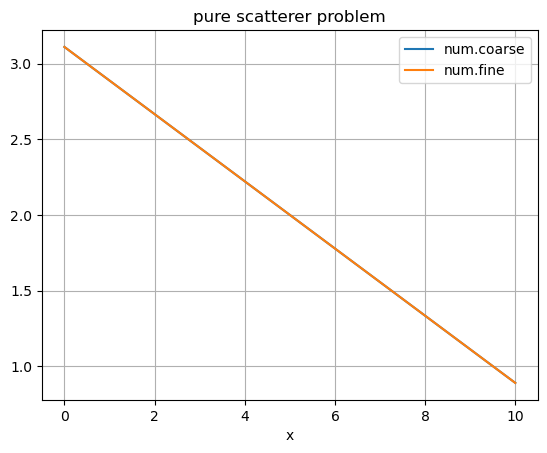

In [9]:
# create solver object
solver = FEM_solver()

# solve
A_coarse,b_coarse = solver.assemble_system(mesh_coarse,prop,bc)
solution_coarse = solver.solve_system(A_coarse,b_coarse)

# solve
A_fine,b_fine = solver.assemble_system(mesh_fine,prop,bc)
solution_fine = solver.solve_system(A_fine, b_fine)

# plots
x_coarse = np.cumsum(mesh_coarse.dx); x_coarse = np.insert(x_coarse,0,0.)
x_fine = np.cumsum(mesh_fine.dx); x_fine = np.insert(x_fine,0,0.)

plt.figure()
plt.plot(x_coarse,solution_coarse, label='num.coarse')
plt.plot(x_fine  ,solution_fine  , label='num.fine')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.title('pure scatterer problem')
plt.show()

# Example-3

In [10]:
D = np.array([2.])
sigma = np.array([0.1])
q = np.array([1.])

prop = {}
prop['src']  = q
prop['D']    = D
prop['siga'] = sigma

bc = {}
bc['xmin']={'type':'neumann','value':-1.}
bc['xmax']={'type':'neumann','value':0.}


# pick 1 region
imat_geo = [0]

widths = np.array([10.])

nrefs_coarse =  5*np.ones(len(imat_geo),dtype=int)
nrefs_fine   = 50*np.ones(len(imat_geo),dtype=int)

In [11]:
mesh_coarse = MESH(imat_geo, imat_geo, widths, nrefs_coarse)
mesh_fine   = MESH(imat_geo, imat_geo, widths, nrefs_fine  )

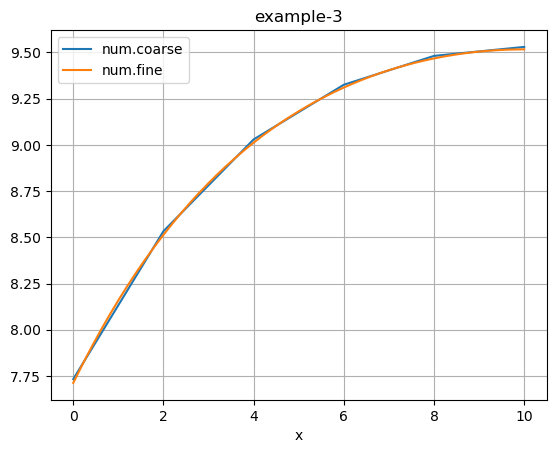

In [12]:
# create solver object
solver = FEM_solver()

# solve
A_coarse,b_coarse = solver.assemble_system(mesh_coarse,prop,bc)
solution_coarse = solver.solve_system(A_coarse,b_coarse)

# solve
A_fine,b_fine = solver.assemble_system(mesh_fine,prop,bc)
solution_fine = solver.solve_system(A_fine, b_fine)

# plots
x_coarse = np.cumsum(mesh_coarse.dx); x_coarse = np.insert(x_coarse,0,0.)
x_fine = np.cumsum(mesh_fine.dx); x_fine = np.insert(x_fine,0,0.)

plt.figure()
plt.plot(x_coarse,solution_coarse, label='num.coarse')
plt.plot(x_fine  ,solution_fine  , label='num.fine')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.title('example-3')
plt.show()